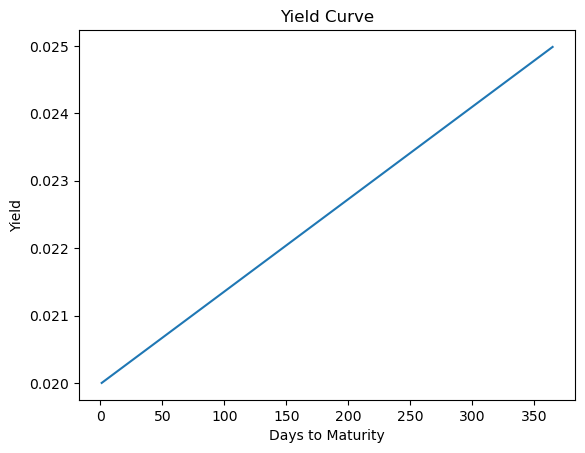

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_yield_curve(initial_rate, total_bp_rise, days_in_year):
    daily_rate_increase = total_bp_rise / days_in_year
    short_term_rates = [initial_rate + i * daily_rate_increase for i in range(days_in_year + 1)]

    long_term_rates = []
    for days_to_maturity in range(1, days_in_year + 1):
        rate_avg = np.mean(short_term_rates[:days_to_maturity])
        long_term_rates.append(rate_avg)

    return long_term_rates

initial_rate = 0.02
total_bp_rise = 0.01
days_in_year = 365

yield_curve = calculate_yield_curve(initial_rate, total_bp_rise, days_in_year)

plt.plot(range(1, days_in_year + 1), yield_curve)
plt.xlabel("Days to Maturity")
plt.ylabel("Yield")
plt.title("Yield Curve")
plt.show()

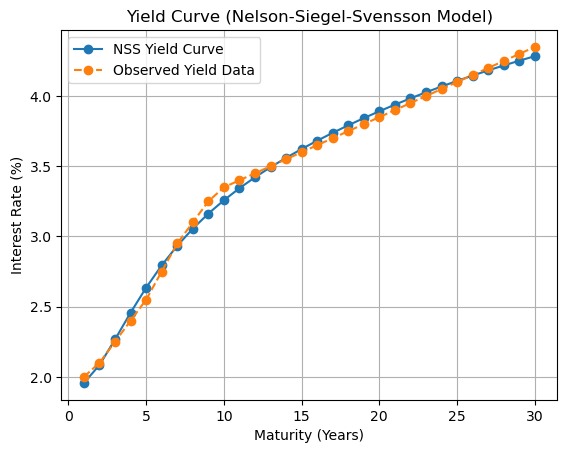

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define maturities (in years)
maturities = np.arange(1, 31)

# Example data: the yield curve at the end of the year
yield_data = np.array([
    2.00, 2.10, 2.25, 2.40, 2.55, 2.75, 2.95, 3.10, 3.25, 3.35, 3.40, 3.45, 3.50,
    3.55, 3.60, 3.65, 3.70, 3.75, 3.80, 3.85, 3.90, 3.95, 4.00, 4.05, 4.10, 4.15, 4.20, 4.25, 4.30, 4.35
])

# Define the Nelson-Siegel-Svensson model
def nelson_siegel_svensson(t, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = beta0
    term2 = beta1 * (1 - np.exp(-t / tau1)) / (t / tau1)
    term3 = beta2 * ((1 - np.exp(-t / tau1)) / (t / tau1) - np.exp(-t / tau1))
    term4 = beta3 * ((1 - np.exp(-t / tau2)) / (t / tau2) - np.exp(-t / tau2))
    
    return term1 + term2 + term3 + term4

# Define the objective function for parameter estimation
def objective(params, maturities, yield_data):
    beta0, beta1, beta2, beta3, tau1, tau2 = params
    nss_curve = nelson_siegel_svensson(maturities, beta0, beta1, beta2, beta3, tau1, tau2)
    return np.sum((nss_curve - yield_data) ** 2)

# Initial parameter guesses
init_params = [2.0, 1.0, -1.0, -1.0, 2.0, 2.0]

# Estimate the NSS model parameters
result = minimize(objective, init_params, args=(maturities, yield_data), method='Nelder-Mead')
beta0, beta1, beta2, beta3, tau1, tau2 = result.x

# Construct the yield curve using the estimated NSS parameters
yield_curve_nss = nelson_siegel_svensson(maturities, beta0, beta1, beta2, beta3, tau1, tau2)

# Plot the yield curve
plt.plot(maturities, yield_curve_nss, marker='o', label='NSS Yield Curve')
plt.plot(maturities, yield_data, marker='o', linestyle='--', label='Observed Yield Data')
plt.xlabel('Maturity (Years)')
plt.ylabel('Interest Rate (%)')
plt.title('Yield Curve (Nelson-Siegel-Svensson Model)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def forward_rate(short_term_rate, long_term_rate, short_term_maturity, long_term_maturity):
    return ((1 + long_term_rate) ** long_term_maturity / (1 + short_term_rate) ** short_term_maturity) ** (1 / (long_term_maturity - short_term_maturity)) - 1

short_term_rate = 0.02  # 2% short-term rate (e.g., 2-year Treasury yield)
long_term_rate = 0.03  # 3% long-term rate (e.g., 10-year Treasury yield)
short_term_maturity = 2
long_term_maturity = 10

forward_rate_2y10y = forward_rate(short_term_rate, long_term_rate, short_term_maturity, long_term_maturity)
print("Forward rate (2-year to 10-year):", forward_rate_2y10y * 100, "%")


Forward rate (2-year to 10-year): 3.251528124197378 %


In [2]:
import numpy as np

# Sample yield curve data (annual interest rates in percentage)
maturities = np.arange(1, 11)
yield_curve = np.array([1.0, 1.5, 2.0, 2.4, 2.8, 3.1, 3.4, 3.6, 3.8, 4.0]) / 100

# Convert annual interest rates to continuously compounded rates
cc_yield_curve = np.log(1 + yield_curve)

# Calculate forward rates
forward_rates = []
for i in range(len(maturities) - 1):
    short_term_rate = cc_yield_curve[i]
    long_term_rate = cc_yield_curve[i + 1]
    short_term_maturity = maturities[i]
    long_term_maturity = maturities[i + 1]
    
    fwd_rate = (long_term_rate * long_term_maturity - short_term_rate * short_term_maturity) / (long_term_maturity - short_term_maturity)
    forward_rates.append(fwd_rate)

# Convert continuously compounded forward rates back to annual interest rates
forward_rates = np.exp(forward_rates) - 1

# Print forward rates
for i in range(len(forward_rates)):
    print(f"Forward rate {i + 1}y-{i + 2}y: {forward_rates[i] * 100:.2f}%")


Forward rate 1y-2y: 2.00%
Forward rate 2y-3y: 3.01%
Forward rate 3y-4y: 3.61%
Forward rate 4y-5y: 4.42%
Forward rate 5y-6y: 4.61%
Forward rate 6y-7y: 5.22%
Forward rate 7y-8y: 5.01%
Forward rate 8y-9y: 5.41%
Forward rate 9y-10y: 5.82%


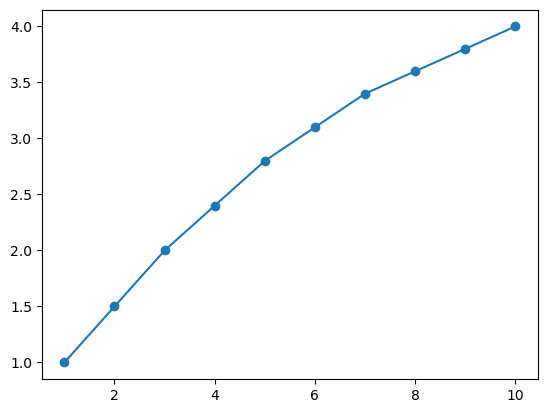

In [3]:
# plot yield curve
import matplotlib.pyplot as plt
plt.plot(maturities, yield_curve * 100, marker='o', label='Yield Curve')


In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Example data: historical yield curve spreads and interest rate changes (0 = no change, 1 = increase, -1 = decrease)
yield_curve_spreads = np.array([0.5, 0.7, 0.3, -0.2, 0.6, 0.8, -0.1, 0.4, 0.9, 0.2])
interest_rate_changes = np.array([1, 1, 0, -1, 1, 1, -1, 1, 1, 0])

# Fit a logistic regression model to the data
model = LogisticRegression()
model.fit(yield_curve_spreads.reshape(-1, 1), interest_rate_changes)

# Predict the probability of interest rate changes based on the current yield curve spread
current_yield_curve_spread = 0.5
probabilities = model.predict_proba(np.array([[current_yield_curve_spread]]))
probability_no_change, probability_increase, probability_decrease = probabilities[0]

print(f"Probability of no change: {probability_no_change * 100:.2f}%")
print(f"Probability of increase: {probability_increase * 100:.2f}%")
print(f"Probability of decrease: {probability_decrease * 100:.2f}%")


Probability of no change: 16.93%
Probability of increase: 19.21%
Probability of decrease: 63.87%
